In [1]:
import pickle

import sys
sys.path.insert(0,'../environments/'); import gw
sys.path.insert(0,'../environments/'); import gridworld_plotting as gp

import imageio
from os import listdir
from os.path import isfile, join

In [46]:
def make_figs(env, figure_data, fig_type, savedir, **kwargs):
    start_ind = kwargs.get('start_ind', 0)
    last_ind = kwargs.get('last_ind', len(figure_data))
    show = kwargs.get('showfig', False)
    reward_location = kwargs.get('reward_location', (10,3))
    
    if fig_type == 'p':
        print(last_ind)
        threshold = kwargs.get('threshold', 0.2)
        for ind, obj in enumerate(figure_data[start_ind:last_ind]):
            gp.plot_polmap(env,obj,
                           save=True,
                           show=show, 
                           directory=savedir,
                           title = f'Policy @ trial {ind}', 
                           rwds=[reward_location],threshold = threshold)
    elif fig_type == 'v':
        v_range = kwargs.get('v_range', [0,1])
        for ind, obj in enumerate(figure_data[start_ind:last_ind]):
            gp.plot_valmap(env,obj,v_range = v_range,
                           save=True,
                           show=show, 
                           directory=savedir,
                           title = f'Value @ trial {ind}', 
                           rwds=[reward_location])
        

def make_gif(source_directory, target_directory, save_title, **kwargs):
    ## works with all images in a directory
    duration = kwargs.get('dur',0.1)

    filenames = [f for f in listdir(source_directory) if isfile(join(source_directory,f))]
    
    images = []
    for filename in filenames:
        images.append(imageio.imread(source_directory+filename))
    
    imageio.mimsave(f'{target_directory}{save_title}.gif', images, duration = duration)

In [41]:
# load data 
load_dir   = '../Blake Meeting/simple_network/'
picklename = 'test'
data = pickle.load(open(load_dir+picklename+'.p','rb'))

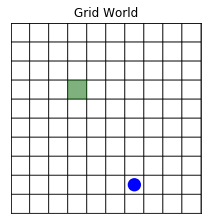

In [42]:
# make environment for plotting
rows, columns = data['env']
env = gw.GridWorld(rows=rows,cols=columns,rewards = {(3,3):1},step_penalization=-0.01)
fig = gw.plotWorld(env,current_state=True,scale=0.35)

## Generate Figures

In [43]:
# collect data to plot
figure_data = data['pol_tracking']
figtype     = 'p' # valid types: p, v
savefig_dir = f'./../Blake Meeting/{figtype}_figs/'

make_figs(env, figure_data, fig_type=figtype, savedir=savefig_dir)

3


## Make GIF 

In [44]:
frame_duration = 0.05
savegif_dir = load_dir
make_gif(source_directory=savefig_dir, target_directory=savegif_dir, save_title=f'{picklename}_{figtype}_gif')

['Policy @ trial 1.png', 'Policy @ trial 0.png', 'Policy @ trial 2.png']
